In [20]:
from model import Dense, Rough
from losses.MeanSquaredError import MSE
from losses.CategoricalCrossEntropy import Entropy
from learning_rate_schedules.LearningRateScheduler import ExponentialDecayScheduler
from utils import sliding_window, plot_curve_fitting, plot_regression, index_plot
from model import compile
from utils import one_hot_encoder, plot_confusion_matrix, visualize2D_data
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler

In [21]:
path = 'data\\ECG Datasets.xlsx'
x=pd.read_excel(path, header=None).to_numpy()[1:].astype('float32')

In [22]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
data = sliding_window(x, 4)
X = data[:, :-1]
Y = data[:,-1]
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, shuffle=False)
X_test, X_val, Y_test, Y_val = train_test_split(X, Y, test_size=0.5, shuffle=False)
Y_train, Y_val, Y_test = Y_train.reshape((-1, 1)), Y_val.reshape((-1, 1)), Y_test.reshape((-1,1))

In [23]:
layer0 = Rough(input_size=3, output_size=5)
layer2 = Dense(input_size=5, output_size=1, activation='linear')
model = compile([layer0, layer2])
model.summary()


 ****************************** model summary ****************************** 

layer 1:
	<class 'layers.Rough.Rough_network.Rough'>
	activation function: sigmoid
	batch size: 32
	input size: 3
	output size: 5
	number of parameters: 45
	number of trainable parameters: 40
	number of non trainable parameters: 5
	--------------------------------------------------
layer 2:
	<class 'layers.Dense.Dense_network.Dense'>
	activation function: linear
	batch size: 32
	input size: 5
	output size: 1
	number of parameters: 6
	number of trainable parameters: 6
	number of non trainable parameters: 0
	--------------------------------------------------
total number of parameters: 51
	total number of trainable parameters: 46
	total number of non trainable parameters: 5
	

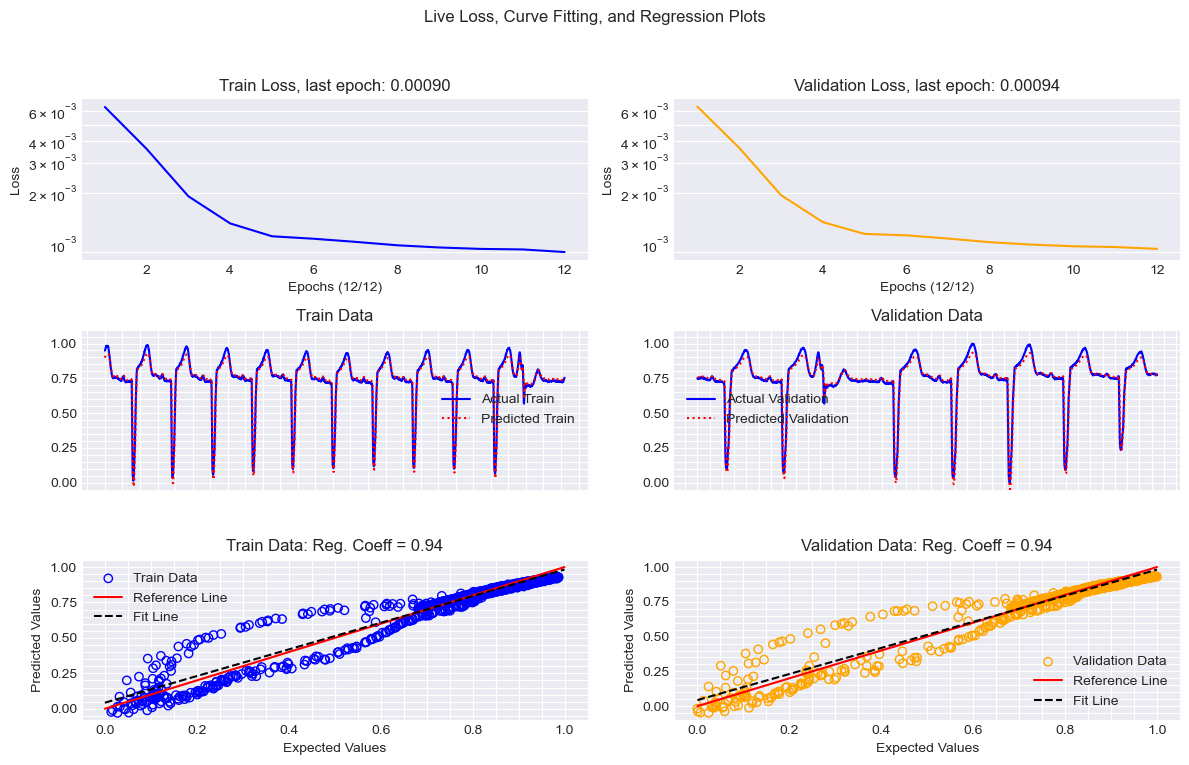

In [24]:
history = model.fit(X_train, X_val, Y_train.reshape(-1,1), Y_val.reshape(-1,1), MSE(), epoch=12,
                    shuffle=True, learning_rate=ExponentialDecayScheduler(lr_initial=0.5, decay_rate=0.6),
                    plot_reg=True, plot_fitting=True, batch_size=8)

Test MSE is 0.00099


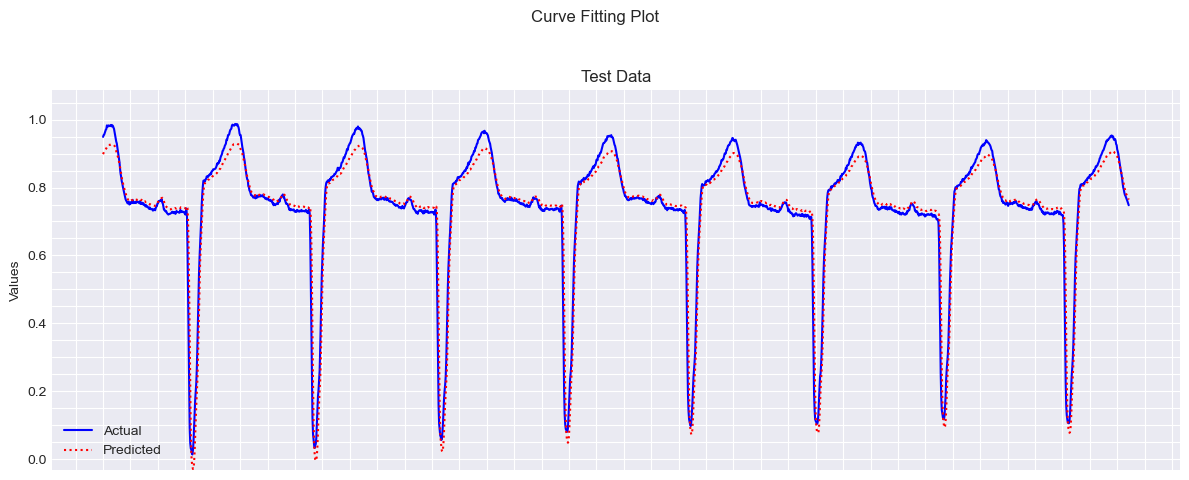

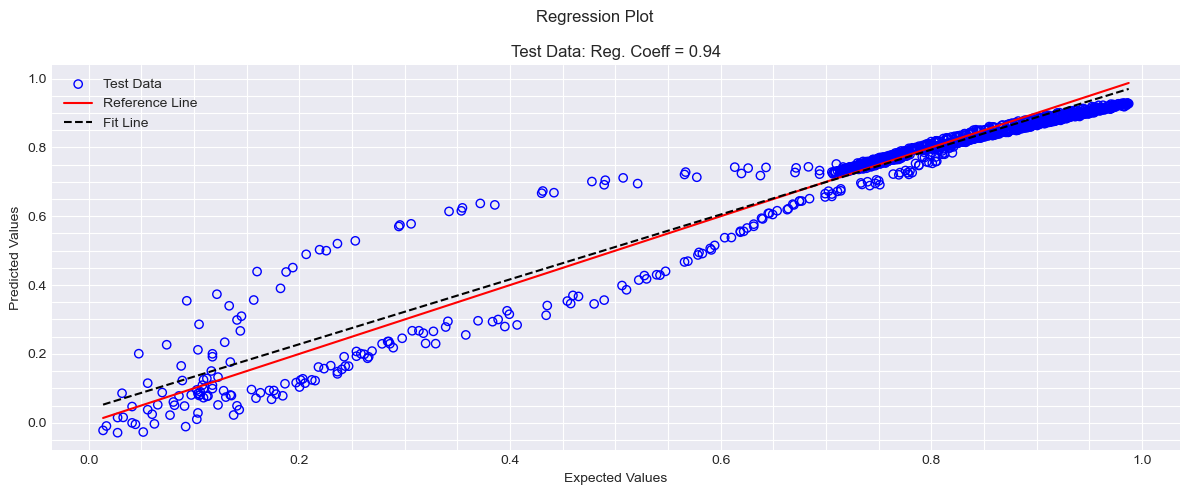

In [25]:
Y_test_predicted = model(X_test)
mse = MSE().forward(Y_test_predicted, Y_test)
print(f'Test MSE is {mse:.5f}')
plot_curve_fitting(Y_test, Y_test_predicted)
plot_regression(Y_test, Y_test_predicted)

In [14]:
layer0 = Dense(input_size=3, output_size=3)
layer2 = Dense(input_size=3, output_size=1, activation='linear')
model = compile([layer0, layer2])
model.summary()


 ****************************** model summary ****************************** 

layer 1:
	<class 'layers.Dense.Dense_network.Dense'>
	activation function: relu
	batch size: 32
	input size: 3
	output size: 3
	number of parameters: 12
	number of trainable parameters: 12
	number of non trainable parameters: 0
	--------------------------------------------------
layer 2:
	<class 'layers.Dense.Dense_network.Dense'>
	activation function: linear
	batch size: 32
	input size: 3
	output size: 1
	number of parameters: 4
	number of trainable parameters: 4
	number of non trainable parameters: 0
	--------------------------------------------------
total number of parameters: 16
	total number of trainable parameters: 16
	total number of non trainable parameters: 0
	

In [17]:
history = model.EKF(X_train, X_val, Y_train, Y_val, MSE(), epoch=5,
                    shuffle=False, plot_loss=False)

Test MSE is 0.00052


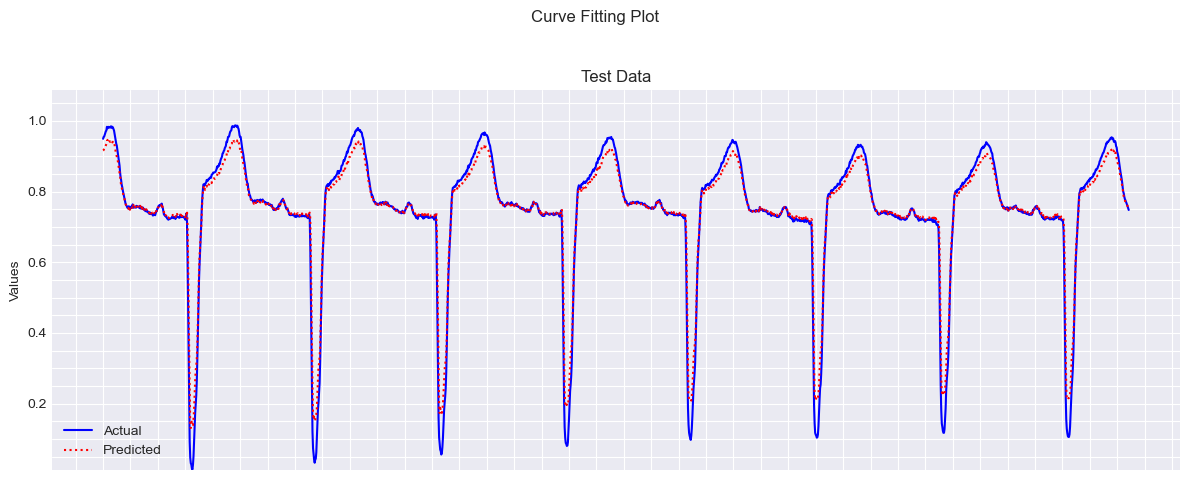

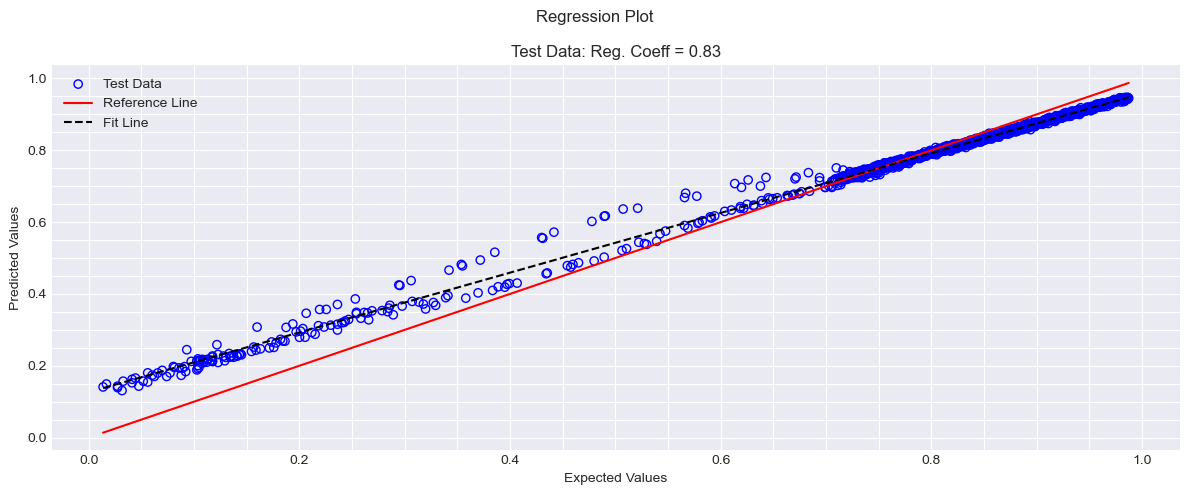

In [18]:
Y_test_predicted = model(X_test)
mse = MSE().forward(Y_test_predicted, Y_test)
print(f'Test MSE is {mse:.5f}')
plot_curve_fitting(Y_test, Y_test_predicted)
plot_regression(Y_test, Y_test_predicted)

In [2]:
path = 'data\\iris.csv'
data=pd.read_csv(path, header=None).to_numpy()[1:]

In [3]:
X = data[:, :-1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
Y, labels = one_hot_encoder(data[:, -1])
# Initialize StratifiedShuffleSplit to maintain class distribution across splits
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# Stratified split for train and validation sets
for train_idx, val_idx in strat_split.split(X, data[:, -1]):  # Pass class labels as stratification criterion
    X_train, X_val = X[train_idx], X[val_idx]
    Y_train, Y_val = Y[train_idx], Y[val_idx]
# Split validation set further into validation and test using stratified sampling again
strat_split_test = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_idx, test_idx in strat_split_test.split(X_val, data[val_idx, -1]):
    X_val, X_test = X_val[val_idx], X_val[test_idx]
    Y_val, Y_test = Y_val[val_idx], Y_val[test_idx]
# Now X_train, X_val, X_test, Y_train, Y_val, Y_test are class-wise split, 
# with consistent representation of each class in all datasets.

In [11]:
layer0 = Dense(input_size=4, output_size=18, activation='tanh', weights_init_method='xavier')
layer1 = Dense(input_size=18, output_size=9, activation='tanh', weights_init_method='xavier')
layer2 = Dense(input_size=9, output_size=3, activation='softmax')
model = compile([layer0, layer1, layer2])
model.summary()


 ****************************** model summary ****************************** 

layer 1:
	<class 'layers.Dense_network.Dense'>
	activation function: tanh
	batch size: 32
	input size: 4
	output size: 18
	number of parameters: 90
	number of trainable parameters: 90
	number of non trainable parameters: 0
	--------------------------------------------------
layer 2:
	<class 'layers.Dense_network.Dense'>
	activation function: tanh
	batch size: 32
	input size: 18
	output size: 9
	number of parameters: 171
	number of trainable parameters: 171
	number of non trainable parameters: 0
	--------------------------------------------------
layer 3:
	<class 'layers.Dense_network.Dense'>
	activation function: softmax
	batch size: 32
	input size: 9
	output size: 3
	number of parameters: 30
	number of trainable parameters: 30
	number of non trainable parameters: 0
	--------------------------------------------------
total number of parameters: 291
	total number of trainable parameters: 291
	total number of

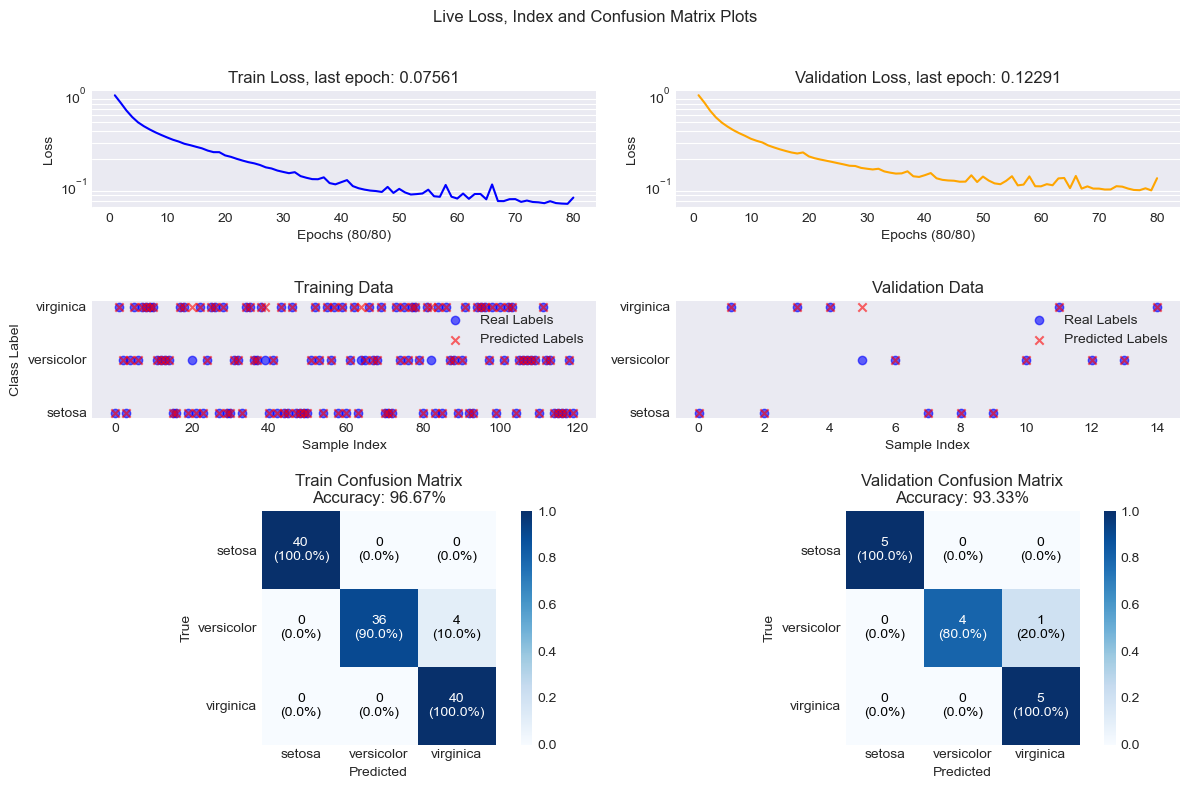

In [12]:
history = model.fit(X_train, X_val, Y_train, Y_val, Entropy(), epoch=80, plot_index=True,
                    shuffle=True, classes=labels, plot_confusion=True, batch_size=1)

Test Entropy is 0.07555


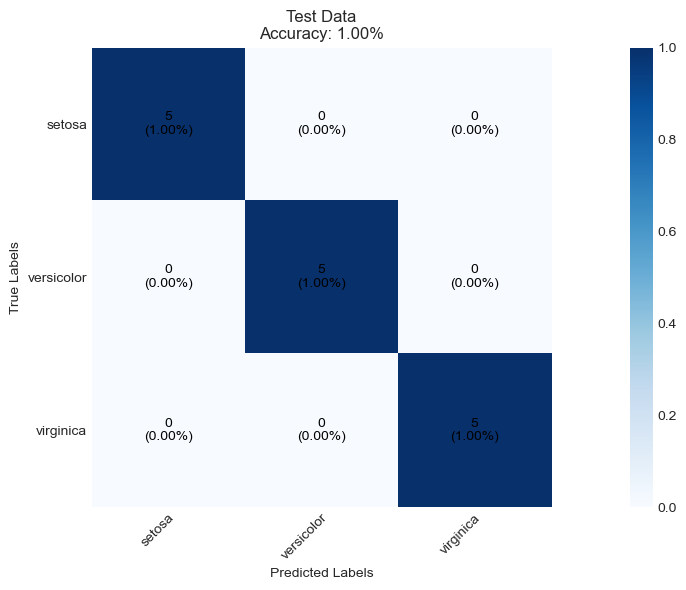

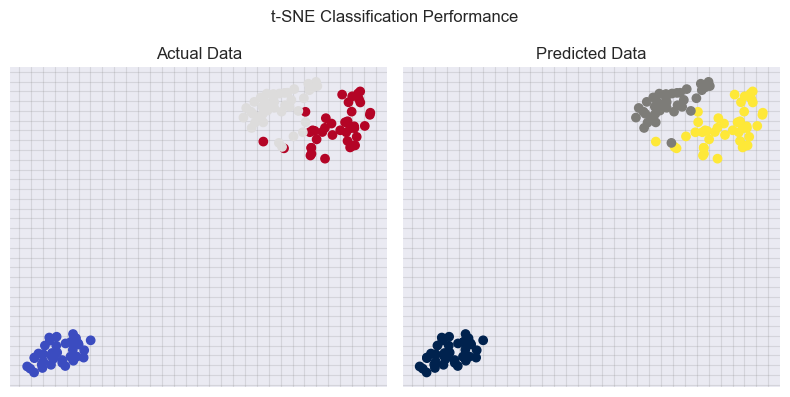

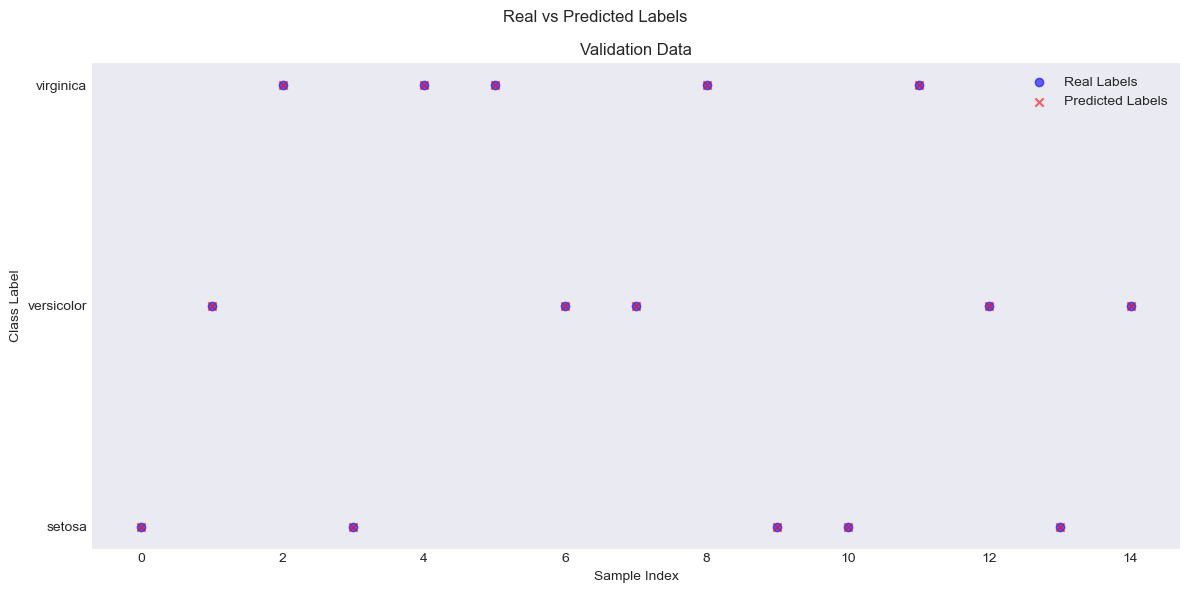

In [13]:
Y_test_predicted = model(X_test)
entropy = Entropy().forward(Y_test_predicted, Y_test)
print(f'Test Entropy is {entropy:.5f}')
plot_confusion_matrix(Y_test, Y_test_predicted, labels)
visualize2D_data(X_train, Y_train, model(X_train))
index_plot(Y_test, Y_test_predicted, labels)